In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

First we'll read the data into a dataframe and then take a look at the data.

In [3]:
avocado_file = "avocado.csv"
avc_df = pd.read_csv(avocado_file)

We convert the date data to datetime format to be used later on.

In [4]:
avc_df['Date'] = pd.to_datetime(avc_df['Date'])
avc_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


I'm just going to try plotting it to see what is going on.

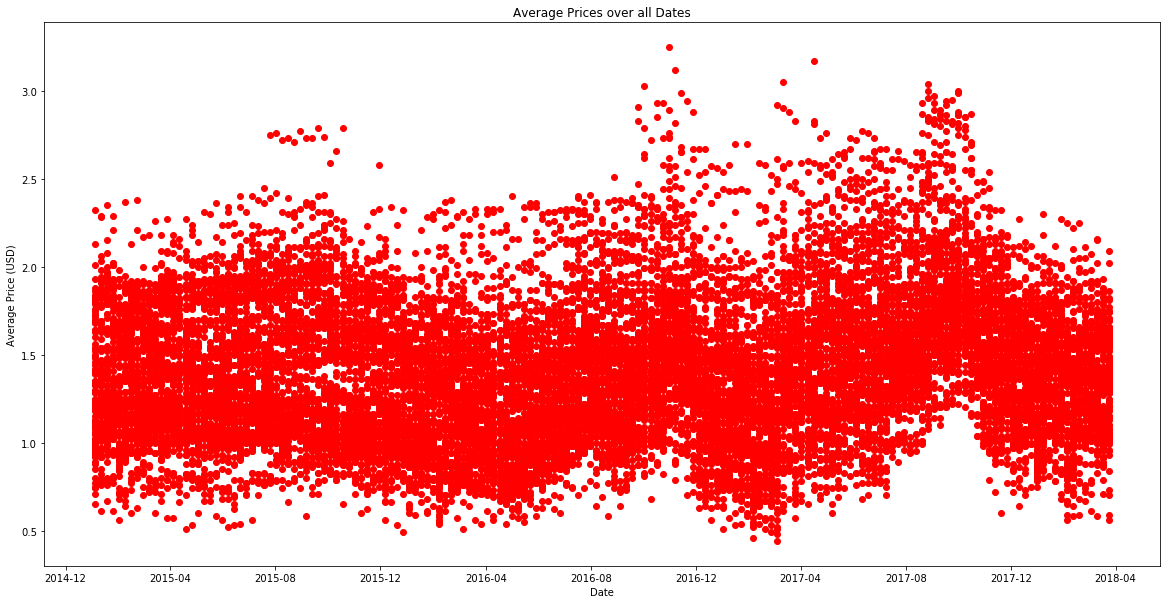

In [5]:
plt.figure(1,figsize=(20,10))
plt.plot(avc_df['Date'],avc_df['AveragePrice'], "ro")
plt.title("Average Prices over all Dates")
plt.ylabel("Average Price (USD)")
plt.xlabel("Date")
plt.show()

From a quick inspection of the data, the messiness of the plot is attributed from the fact that multiple prices are plotted on the same date, this would suggest that there must be some column which is attributing to the non-unique Date values. It would appear that the region column is a contributing factor.

In [6]:
avc_df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego',
       'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral',
       'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS',
       'West', 'WestTexNewMexico'], dtype=object)

For now, I will pick 'LosAngeles' as my working region just to look through the data some more.

In [7]:
la_df = avc_df[avc_df['region']=='LosAngeles']

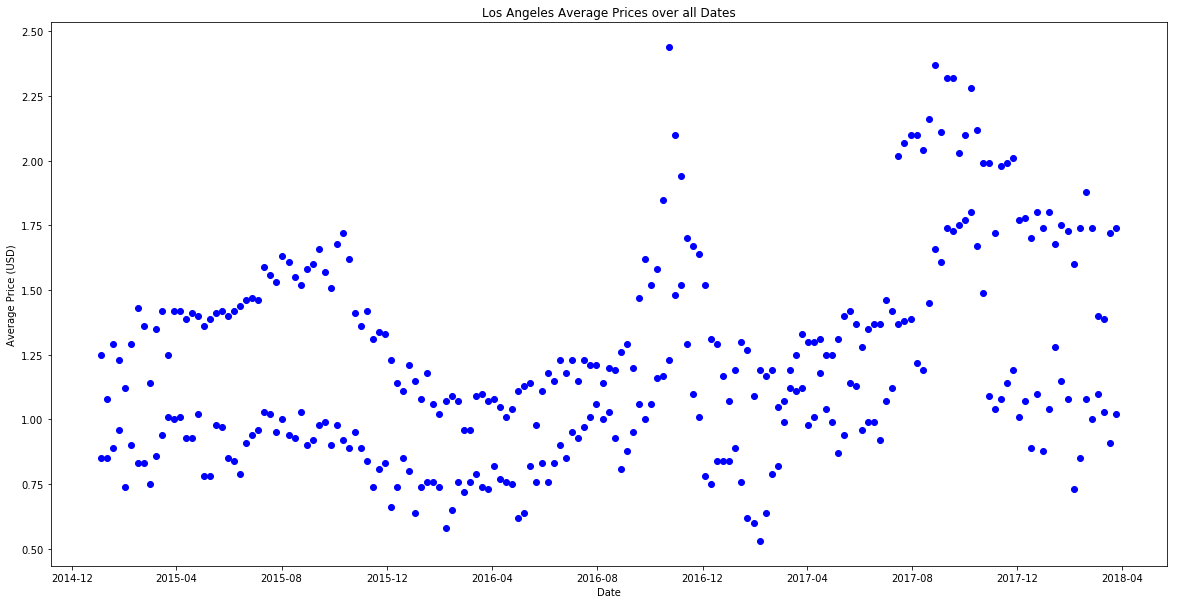

In [8]:
plt.figure(1,figsize=(20,10))
plt.plot(la_df['Date'], la_df['AveragePrice'], 'bo')
plt.title("Los Angeles Average Prices over all Dates")
plt.ylabel("Average Price (USD)")
plt.xlabel("Date")
plt.show()

It appears that there may be two trends going on here, so we'll further split the data down. This time we'll take a look at the type of avocados.

In [9]:
la_df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [10]:
la_org_df = la_df[la_df['type']=='organic']
la_con_df = la_df[la_df['type']=='conventional']

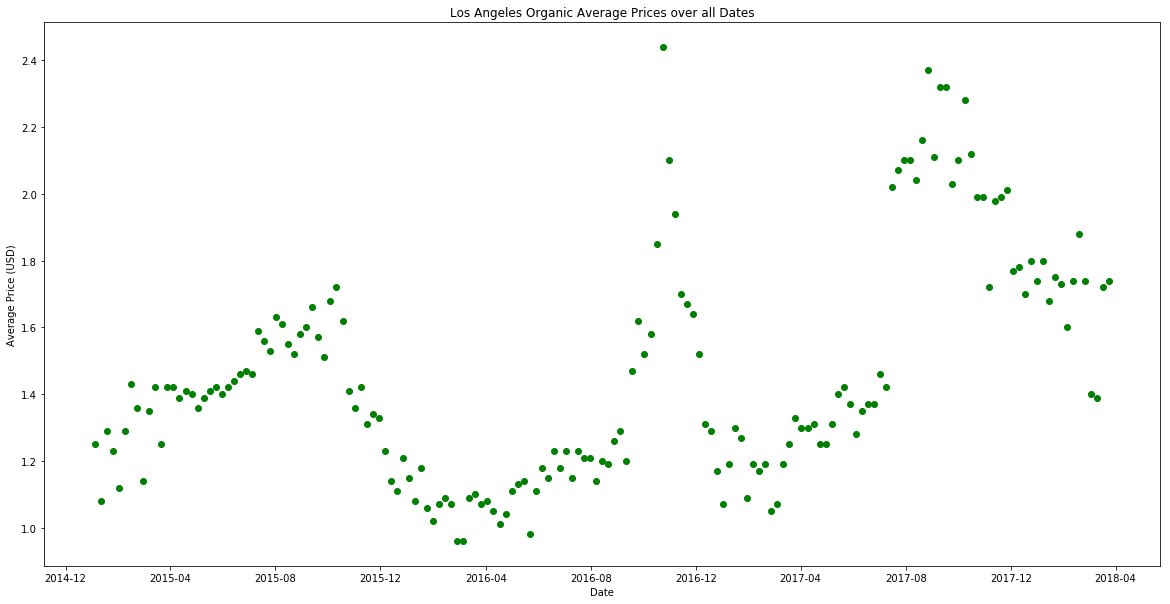

In [11]:
plt.figure(1,figsize=(20,10))
plt.plot(la_org_df['Date'], la_org_df['AveragePrice'], 'go')
plt.title("Los Angeles Organic Average Prices over all Dates")
plt.ylabel("Average Price (USD)")
plt.xlabel("Date")
plt.show()

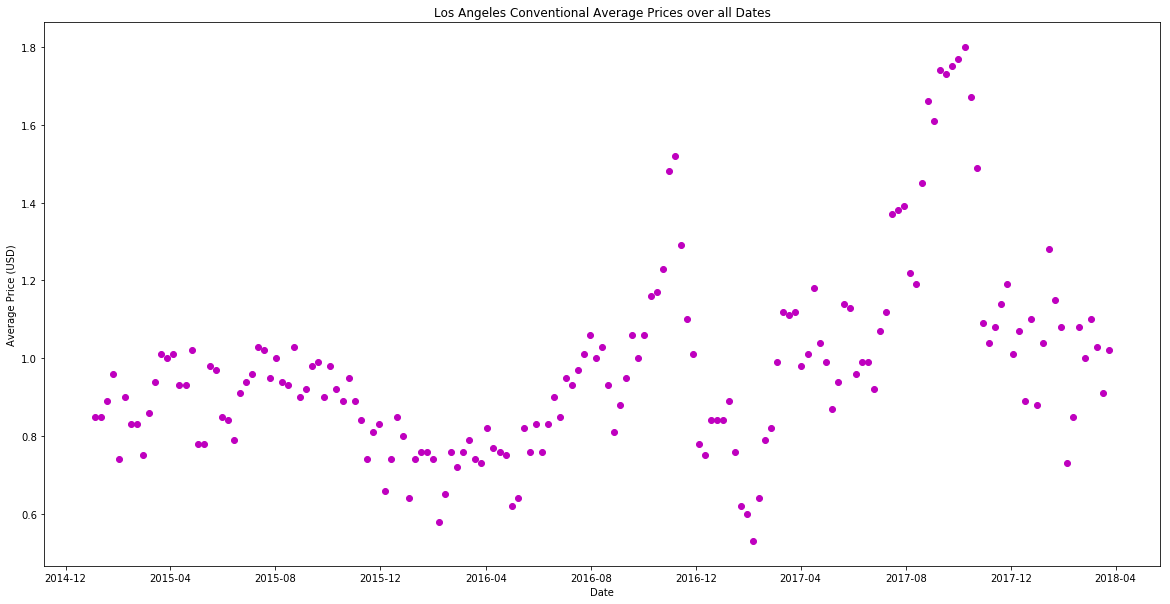

In [12]:
plt.figure(1,figsize=(20,10))
plt.plot(la_con_df['Date'], la_con_df['AveragePrice'], 'mo')
plt.title("Los Angeles Conventional Average Prices over all Dates")
plt.ylabel("Average Price (USD)")
plt.xlabel("Date")
plt.show()

Just from viewing these two plots alone, I can see that the prices of avocados change drastically from year to year and they don't appear to stay the same in the same month. We'll add regression lines to inspect it some more.

In [13]:
from sklearn.linear_model import LinearRegression

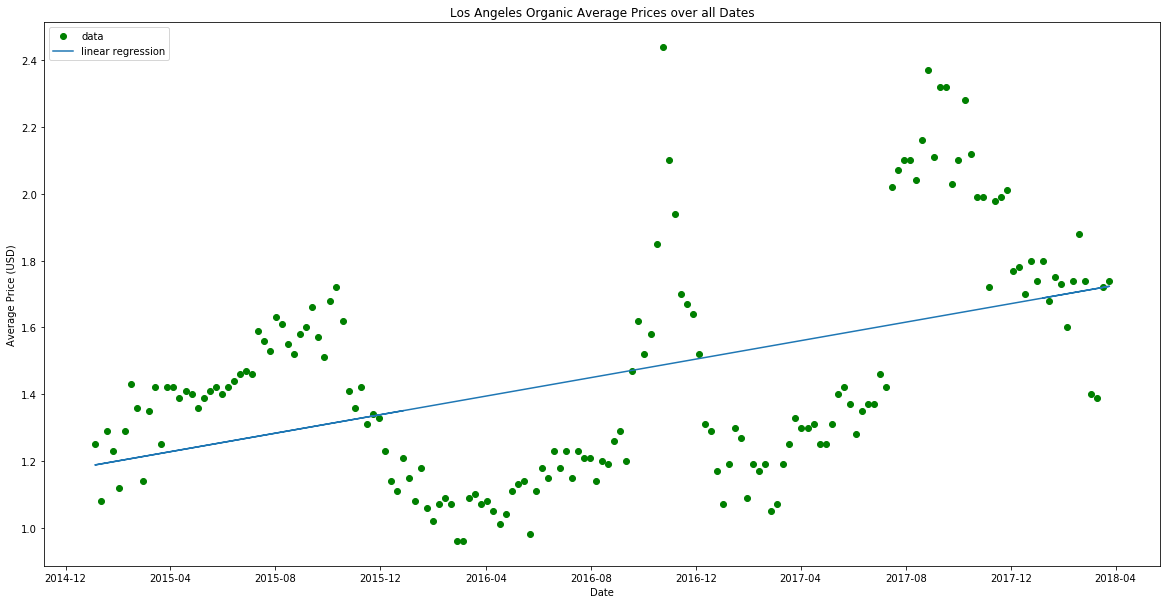

In [14]:
X = pd.to_numeric(la_org_df['Date']).values.reshape(-1,1)
y = la_org_df['AveragePrice'].values.reshape(-1,1)
la_org_lr = LinearRegression()
la_org_lr = la_org_lr.fit(X,y)
y_pred = la_org_lr.predict(X)

plt.figure(1,figsize=(20,10))
plt.plot(la_org_df['Date'], la_org_df['AveragePrice'], 'go', label="data")
plt.plot(la_org_df['Date'],y_pred, label="linear regression")
plt.title("Los Angeles Organic Average Prices over all Dates")
plt.ylabel("Average Price (USD)")
plt.xlabel("Date")
plt.legend(loc="upper left")
plt.show()

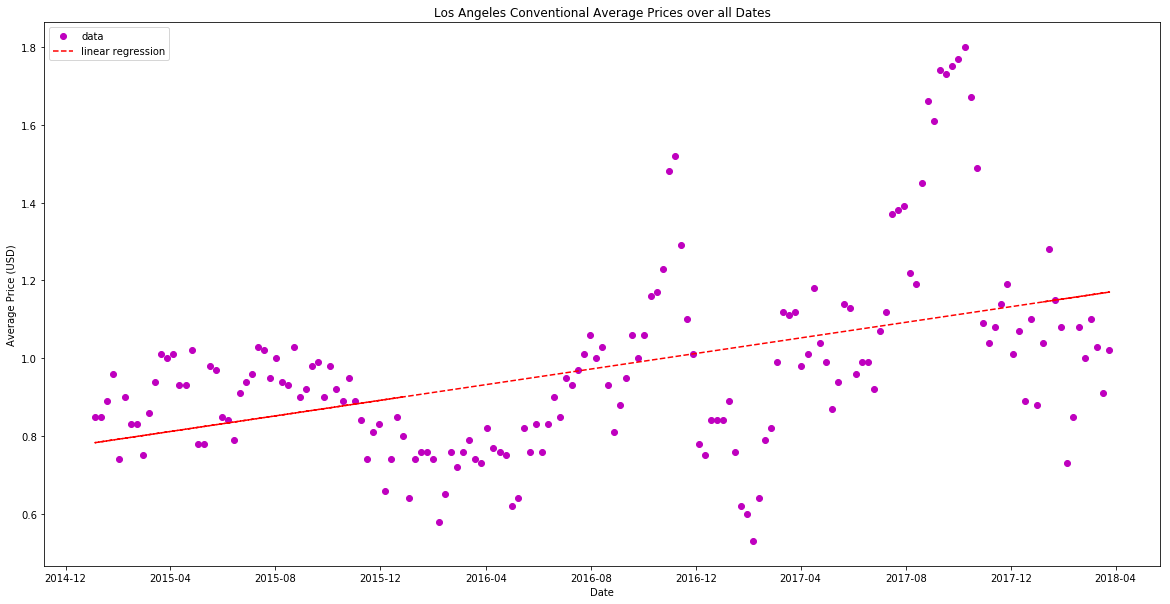

In [15]:
X = pd.to_numeric(la_con_df['Date']).values.reshape(-1,1)
y = la_con_df['AveragePrice'].values.reshape(-1,1)
la_con_lr = LinearRegression()
la_con_lr = la_con_lr.fit(X,y)
y_pred = la_con_lr.predict(X)

plt.figure(1,figsize=(20,10))
plt.plot(la_con_df['Date'], la_con_df['AveragePrice'], 'mo', label="data")
plt.plot(la_con_df['Date'],y_pred, 'r--', label="linear regression")
plt.title("Los Angeles Conventional Average Prices over all Dates")
plt.ylabel("Average Price (USD)")
plt.xlabel("Date")
plt.legend(loc="upper left")
plt.show()

Linear Regression shows that both types of avocados' prices in the Los Angeles region appear to be trending upwards. In this case, if we wanted to predict the price of an Avocado in 2019 or the future based on what month it is (especially around October and November), we would have a hard time getting accurate predictions. 

Inevitably, I still want to predict something from this dataset. So now I'll try to inspect more things, like do the prices differ vastly between regions.

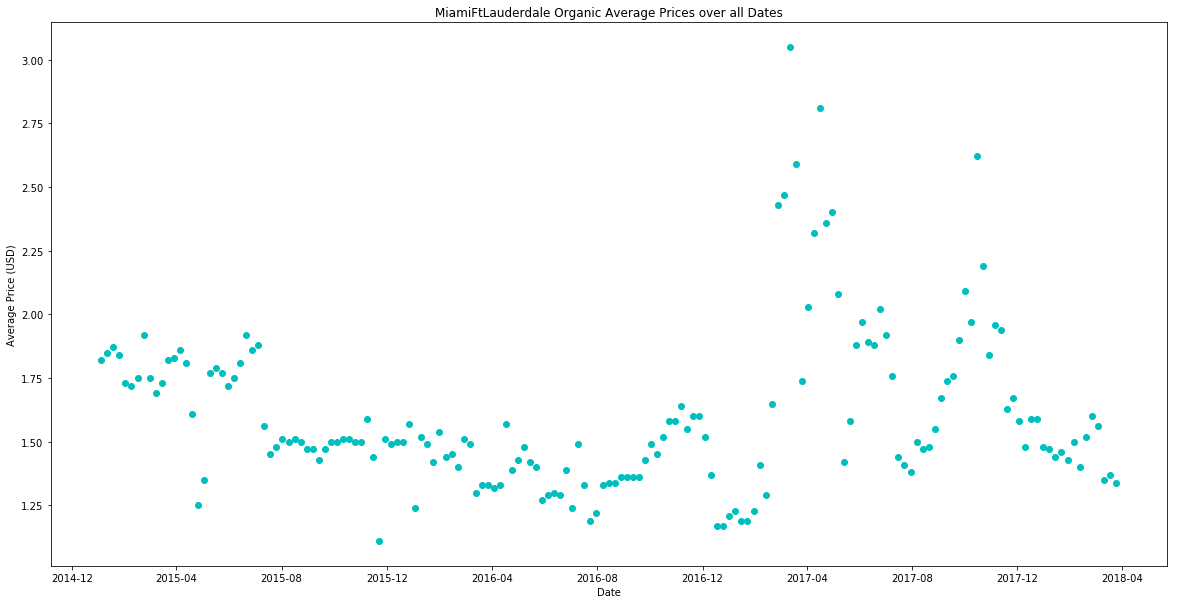

In [16]:
miami_df = avc_df[avc_df['region']=='MiamiFtLauderdale']
miami_org_df = miami_df[miami_df['type']=='organic']

plt.figure(1, figsize=(20,10))
plt.plot(miami_org_df['Date'],miami_org_df['AveragePrice'], 'co')
plt.title("MiamiFtLauderdale Organic Average Prices over all Dates")
plt.ylabel("Average Price (USD)")
plt.xlabel("Date")
plt.show()

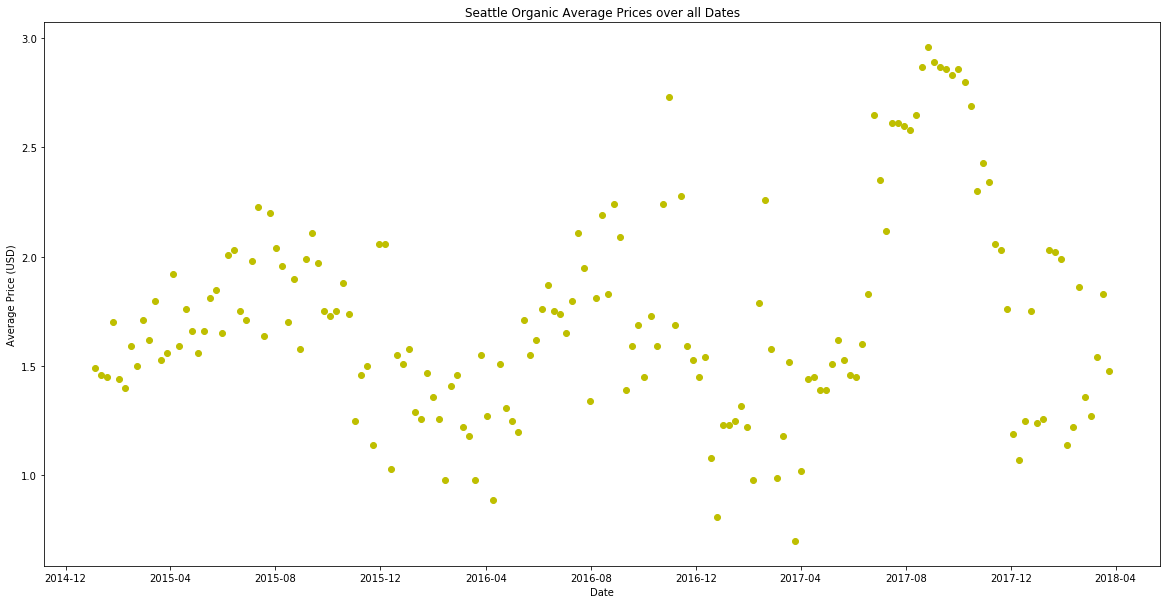

In [17]:
sea_df = avc_df[avc_df['region']=='Seattle']
sea_org_df = sea_df[sea_df['type']=='organic']

plt.figure(1, figsize=(20,10))
plt.plot(sea_org_df['Date'],sea_org_df['AveragePrice'], 'yo')
plt.title("Seattle Organic Average Prices over all Dates")
plt.ylabel("Average Price (USD)")
plt.xlabel("Date")
plt.show()

It appears that the prices of each region differ quite significantly depending on month and year from a visual inspection. I will try to predict the region of the avocado from the price, type, and month. Firstly though, I will make separate dataframes which include only specific regions like 'LosAngeles' and 'Seattle' from another dataframe which include larger areas like 'Southeast', 'Northeast', and 'Midsouth'. 

In [18]:
cities = ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville',
       'MiamiFtLauderdale', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego',
       'SanFrancisco', 'Seattle', 'StLouis', 'Syracuse', 'Tampa']

city_df = avc_df[avc_df['region'].isin(cities)].copy(deep=True)
region_df = avc_df[~avc_df['region'].isin(cities)].copy(deep=True)

I will average the prices based on month.

In [19]:
city_df['month'] = city_df['Date'].dt.month
city_df = city_df.drop(['Unnamed: 0','Total Volume','4046','4225','4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Date'], axis=1)

In [20]:
averaged_by_month = city_df.groupby(['year','month','region','type']).mean()['AveragePrice'].values

In [21]:
city_df = city_df.drop(['AveragePrice'], axis=1)
city_df = city_df.drop_duplicates()
city_df['pricemonth'] = averaged_by_month

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [23]:
region_enc = LabelEncoder()
region_enc.fit(city_df['region'])
city_df['region'] = region_enc.transform(city_df['region'])

month_enc = LabelEncoder()
month_enc.fit(city_df['month'])
city_df['month'] = month_enc.transform(city_df['month'])

type_enc = LabelEncoder()
type_enc.fit(city_df['type'])
city_df['type'] = type_enc.transform(city_df['type'])

In [24]:
X = city_df[['year','month','type','pricemonth']].values.reshape(-1,4)
y = city_df['region'].values.reshape(-1,1)
train_X, test_X, train_y, test_y = train_test_split(X,y)

In [25]:
rfc = RandomForestClassifier()

rfc.fit(train_X, train_y.ravel())

pred_y = rfc.predict(test_X)

In [26]:
accuracy_score(test_y, pred_y)

0.001221001221001221

As we can see the classification accuracy is extremely poor. The high degree of variance in prices makes it extremely difficult for the classifier to predict which region it is just based on these variables. We can try using the larger regions to see if it may predict it better for fewer region categories. I would argue that its possible that we try a different classifier to see if any results change but I strongly believe that with such a low initial accuracy score, we won't expect to see much difference with another classifier without heavily overfitting.

In [27]:
city_df['region'] = region_enc.inverse_transform(city_df['region'])
city_df['month'] = month_enc.inverse_transform(city_df['month'])
city_df['type'] = type_enc.inverse_transform(city_df['type'])

In [28]:
region_df['month'] = region_df['Date'].dt.month
region_df = region_df.drop(['Unnamed: 0','Total Volume','4046','4225','4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Date'], axis=1)
averaged_by_month = region_df.groupby(['year','month','region','type']).mean()['AveragePrice'].values
region_df = region_df.drop(['AveragePrice'], axis=1)
region_df = region_df.drop_duplicates()
region_df['pricemonth'] = averaged_by_month
region_enc = LabelEncoder()
region_enc.fit(region_df['region'])
region_df['region'] = region_enc.transform(region_df['region'])

month_enc = LabelEncoder()
month_enc.fit(region_df['month'])
region_df['month'] = month_enc.transform(region_df['month'])

type_enc = LabelEncoder()
type_enc.fit(region_df['type'])
region_df['type'] = type_enc.transform(region_df['type'])
X = region_df[['year','month','type','pricemonth']].values.reshape(-1,4)
y = region_df['region'].values.reshape(-1,1)
train_X, test_X, train_y, test_y = train_test_split(X,y)
rfc = RandomForestClassifier()

rfc.fit(train_X, train_y.ravel())

pred_y = rfc.predict(test_X)
accuracy_score(test_y, pred_y)

0.02564102564102564

This evidently does not work either with an accuracy of roughly 0.4%. I suspect it would have to do with the fact that between year to year. Avocado prices in across many regions seem to overlap one another, so an avocado priced at $1.20 may in fact be from multiple regions even if we know the year, month, and type. Perhaps if we were to predict the type of avocado from a single region, we may fare a better chance at a higher prediction accuracy.

In [29]:
region_df['region'] = region_enc.inverse_transform(region_df['region'])
region_df['month'] = month_enc.inverse_transform(region_df['month'])
region_df['type'] = type_enc.inverse_transform(region_df['type'])

In [30]:
sea_df = city_df[city_df['region']=='Seattle'].copy(deep=True)

In [31]:
region_enc = LabelEncoder()
region_enc.fit(sea_df['region'])
sea_df['region'] = region_enc.transform(sea_df['region'])

month_enc = LabelEncoder()
month_enc.fit(sea_df['month'])
sea_df['month'] = month_enc.transform(sea_df['month'])

type_enc = LabelEncoder()
type_enc.fit(sea_df['type'])
sea_df['type'] = type_enc.transform(sea_df['type'])

In [32]:
X = sea_df[['year','month','pricemonth']].values.reshape(-1,3)
y = sea_df['type'].values.reshape(-1,1)
train_X, test_X, train_y, test_y = train_test_split(X,y)

rfc = RandomForestClassifier()

rfc.fit(train_X, train_y.ravel())

pred_y = rfc.predict(test_X)

accuracy_score(test_y, pred_y)

0.5

In [33]:
print(np.sum(test_y))
print(len(test_y))

8
20


The prediction accuracy here (~50%) is much better compared to trying to predict the region. Also from a quick check using np.sum(test_y), we know that the split isn't exactly 50/50 for conventional and organic avocados so the classifier can't just guess only 1 type and still have 50% accuracy. The problem with this is that we're working with too small of a sample size in both the training and testing data. If we were to add more regions I would be doubtful that the accuray would go up a lot more because we would be adding the regions column as part of the training data anyway. 

For these reasons, I don't think it's worthwhile trying to predict anything about avocados. But rather explore why it isn't possible to predict avocados by performing some data analysis to see where most of the prices end up between each year for each avocado type.

In [39]:
import seaborn as sns

In [54]:
org_df = avc_df[avc_df['type']=='organic']
con_df = avc_df[avc_df['type']=='conventional']

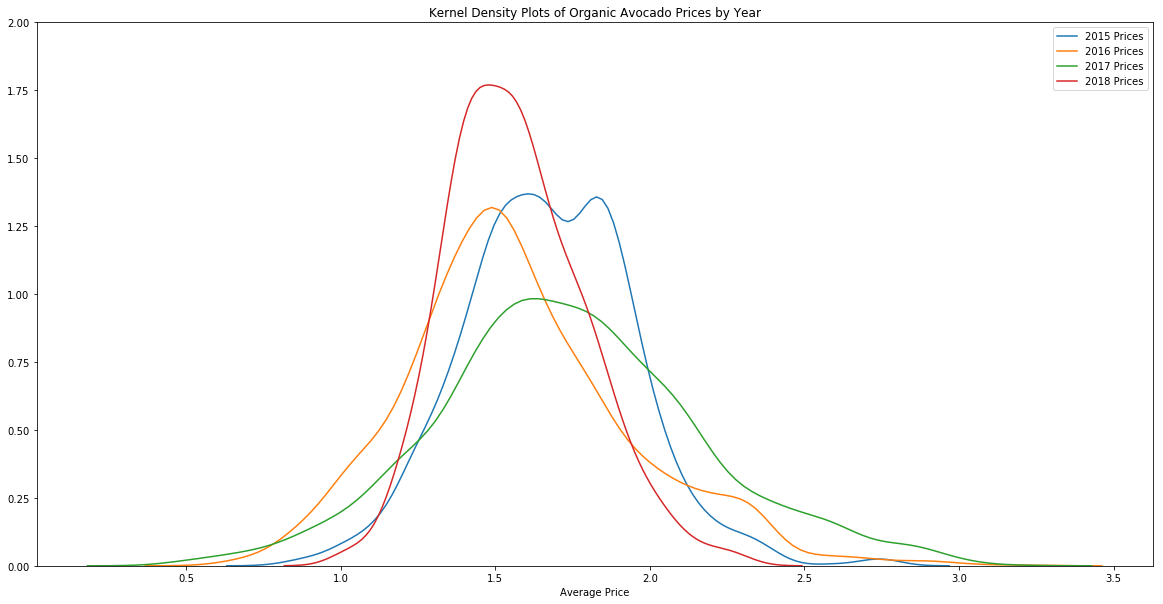

In [58]:
plt.figure(figsize=(20,10))
sns.kdeplot(org_df[org_df['year']==2015]['AveragePrice'], label="2015 Prices")
sns.kdeplot(org_df[org_df['year']==2016]['AveragePrice'], label="2016 Prices")
sns.kdeplot(org_df[org_df['year']==2017]['AveragePrice'], label="2017 Prices")
sns.kdeplot(org_df[org_df['year']==2018]['AveragePrice'], label="2018 Prices")
plt.ylim((0,2))
plt.title("Kernel Density Plots of Organic Avocado Prices by Year")
plt.xlabel("Average Price")
plt.show()

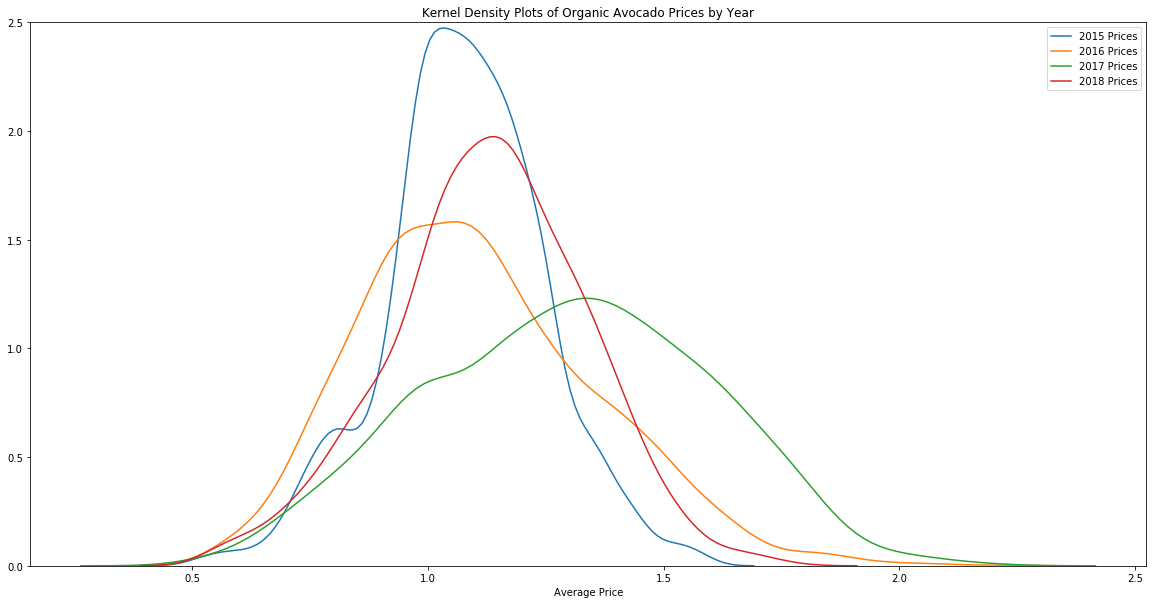

In [59]:
plt.figure(figsize=(20,10))
sns.kdeplot(con_df[con_df['year']==2015]['AveragePrice'], label="2015 Prices")
sns.kdeplot(con_df[con_df['year']==2016]['AveragePrice'], label="2016 Prices")
sns.kdeplot(con_df[con_df['year']==2017]['AveragePrice'], label="2017 Prices")
sns.kdeplot(con_df[con_df['year']==2018]['AveragePrice'], label="2018 Prices")
plt.ylim((0,2.5))
plt.title("Kernel Density Plots of Conventional Avocado Prices by Year")
plt.xlabel("Average Price")
plt.show()

From the two plots displayed here, we see that organic avocado prices are generally more volatile as shown by the fact that there are lower peaks and longer tails in the distribution. In both the organic and conventional avocado prices, it appears that they are both more likely to be expensive than they are likely to be cheap. Overall, conventional avocados tend to be priced around $1.15 compared to $1.55 for organic avocados. For the most part, all of the curves seem to be relatively the same except for 2017 Prices. This year in particular, it appears that avocado prices for both types tended to be much more expensive. If we take a deep dive into external sources (https://money.cnn.com/2017/09/09/news/economy/avocado-prices-soar/index.html), it would appear that in 2017 avocados had a weak harvest all the while the demands continued to grow. This would explain the major price hike in comparison to other years. 

To further see why we can't predict the region based on AveragePrice, we need to see the distribution of prices based for each region.

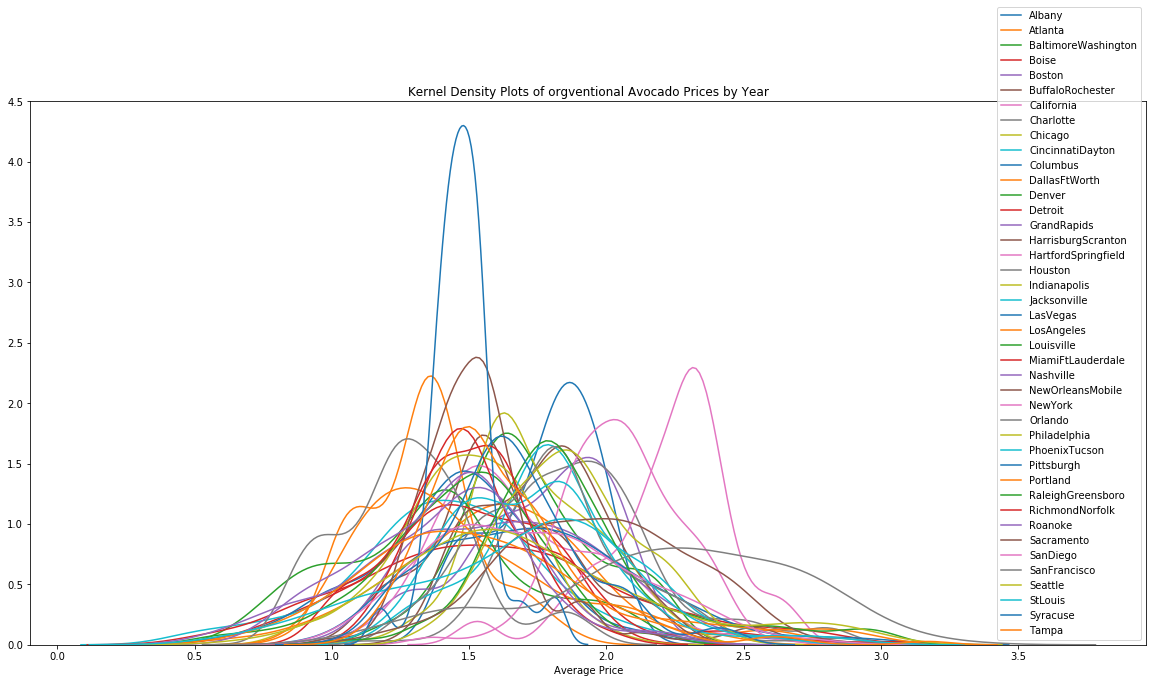

In [63]:
plt.figure(figsize=(20,10))
for city in cities:
    sns.kdeplot(org_df[org_df['region']==city]['AveragePrice'], label=city)
plt.ylim((0,4.5))
plt.title("Kernel Density Plots of Organic Avocado Prices by Region")
plt.xlabel("Average Price")
plt.show()

The density graph shows that all of the regions of the city kind overlap significantly. Even if we were to seperate the plots out by year, the overlap would still be present which is the most likely reason why it is so difficult for the classifier to be accurate. 